<a href="https://colab.research.google.com/github/sascucho/datos-cultivos-colombia-2006-2024/blob/main/datos_colombia.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [47]:
import pandas as pd
import os

In [ ]:
datos1 = pd.read_excel("/content/drive/MyDrive/CIENCIA DE DATOS ANDRES NIÑO/COLOMBIA/datos/datos_2006_2018.xlsx")
datos1.head()

In [56]:
datos1.shape

(210847, 17)

In [ ]:
datos2 = pd.read_excel("/content/drive/MyDrive/CIENCIA DE DATOS ANDRES NIÑO/COLOMBIA/datos/datos_2019_2024.xlsx")
datos2.head()


In [51]:
datos2.shape

(141073, 17)

In [52]:
datos1.shape[0] + datos2.shape[0]

351920

6. CONCATENAR

In [57]:
print("Columns in datos1:", datos1.columns.tolist())
print("Columns in datos2:", datos2.columns.tolist())

datos2.columns = datos1.columns[:len(datos2.columns)]

datos_colombia_consolidado = pd.concat([datos1, datos2], ignore_index=True)

output_dir = "/content/drive/MyDrive/CIENCIA DE DATOS ANDRES NIÑO/COLOMBIA/datos"
os.makedirs(output_dir, exist_ok=True)

output_path = os.path.join(output_dir, "datos_2006_2024.xlsx")
datos_colombia_consolidado.to_excel(output_path, index=False)

print(f"Data concatenated and saved to {output_path}")

Columns in datos1: ['Código Dane departamento', 'Departamento', 'Código Dane municipio', 'Municipio', 'Grupo cultivo', 'Subgrupo', 'Cultivo', 'Desagregación cultivo', 'Año', 'Periodo', 'Área sembrada (ha)', 'Área cosechada (ha)', 'Producción (t)', 'Rendimiento (t/ha)', 'Estado físico del cultivo', 'Nombre científico del cultivo', 'Ciclo del cultivo']
Columns in datos2: ['Código Dane departamento', 'Departamento', 'Código Dane municipio', 'Municipio', 'Grupo cultivo', 'Subgrupo', 'Cultivo', 'Desagregación cultivo', 'Año', 'Periodo', 'Área sembrada (ha)', 'Área cosechada (ha)', 'Producción (t)', 'Rendimiento (t/ha)', 'Estado físico del cultivo', 'Nombre científico del cultivo', 'Ciclo del cultivo']
Data concatenated and saved to /content/drive/MyDrive/CIENCIA DE DATOS ANDRES NIÑO/COLOMBIA/datos/datos_2006_2024.xlsx


## **7. Revisar y garantizar homogeneidad en Departamento y Cultivo**

In [ ]:
%pip install unidecode

In [ ]:
%pip install fuzzywuzzy python-Levenshtein

In [ ]:
import pandas as pd
import unidecode
import re
import os
from fuzzywuzzy import process

# Load the consolidated file
file_path = "/content/drive/MyDrive/CIENCIA DE DATOS ANDRES NIÑO/COLOMBIA/datos/datos_2006_2024.xlsx"
df = pd.read_excel(file_path)

# Show initial unique values of Cultivo
print("Valores únicos iniciales en 'Cultivo':")
display(df['Cultivo'].unique())

# Function to normalize text (reusing the previously defined function)
def normalize_text_upper(text):
    if isinstance(text, str):
        # Remove accents, convert to uppercase, remove extra spaces and special characters
        text = unidecode.unidecode(text).upper()
        text = re.sub(r'[^A-Z0-9\s]', '', text) # Keep only uppercase letters, numbers, and spaces
        text = re.sub(r'\s+', ' ', text).strip() # Replace multiple spaces with single space and strip
        return text
    return text

# Apply normalization to 'Cultivo' column
df['Cultivo_normalized'] = df['Cultivo'].apply(normalize_text_upper)

print("\nValores normalizados en 'Cultivo_normalized' (primeras filas):")
display(df[['Cultivo', 'Cultivo_normalized']].head())

print("\nValores únicos después de la normalización:")
display(df['Cultivo_normalized'].unique())

In [8]:
# Specify the output directory and filename
output_dir = "/content/drive/MyDrive/CIENCIA DE DATOS ANDRES NIÑO/COLOMBIA/datos"
output_filename = "datos_2006_2024_limpio.xlsx"
output_path = os.path.join(output_dir, output_filename)

# Create the directory if it doesn't exist
os.makedirs(output_dir, exist_ok=True)

# Save the dataframe to an Excel file
df.to_excel(output_path, index=False)

print(f"La base de datos corregida ha sido guardada en: {output_path}")

La base de datos corregida ha sido guardada en: /content/drive/MyDrive/CIENCIA DE DATOS ANDRES NIÑO/COLOMBIA/datos/datos_2006_2024_limpio.xlsx


### **8.Análisis Exploratorio de los Datos (2006–2024)**

In [ ]:
datos3 = pd.read_excel("/content/drive/MyDrive/CIENCIA DE DATOS ANDRES NIÑO/COLOMBIA/datos/datos_2006_2024_limpio.xlsx")
datos3.head()

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Load the dataframe again to ensure we are using the latest version (optional, but good practice)
# file_path = "/content/drive/MyDrive/CIENCIA DE DATOS ANDRES NIÑO/COLOMBIA/datos/datos_2006_2024_limpio.xlsx"
# datos3 = pd.read_excel(file_path)

# 1. Cantidad de filas y columnas
num_rows = datos3.shape[0]
num_cols = datos3.shape[1]
print(f"Cantidad de filas: {num_rows}")
print(f"Cantidad de columnas: {num_cols}")

# 2. Cantidad de datos faltantes por columna
print("\nCantidad de datos faltantes por columna:")
missing_data = datos3.isnull().sum().sort_values(ascending=False)
display(missing_data[missing_data > 0])

# 3. Número total de cultivos únicos y lista de ellos (using the normalized column)
unique_cultivo_count = datos3['Cultivo_normalized'].nunique()
print(f"\nNúmero total de cultivos únicos (normalizados): {unique_cultivo_count}")
print("\nLista de cultivos únicos (normalizados):")
display(datos3['Cultivo_normalized'].unique())


/tmp/ipython-input-2991236269.py:17: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




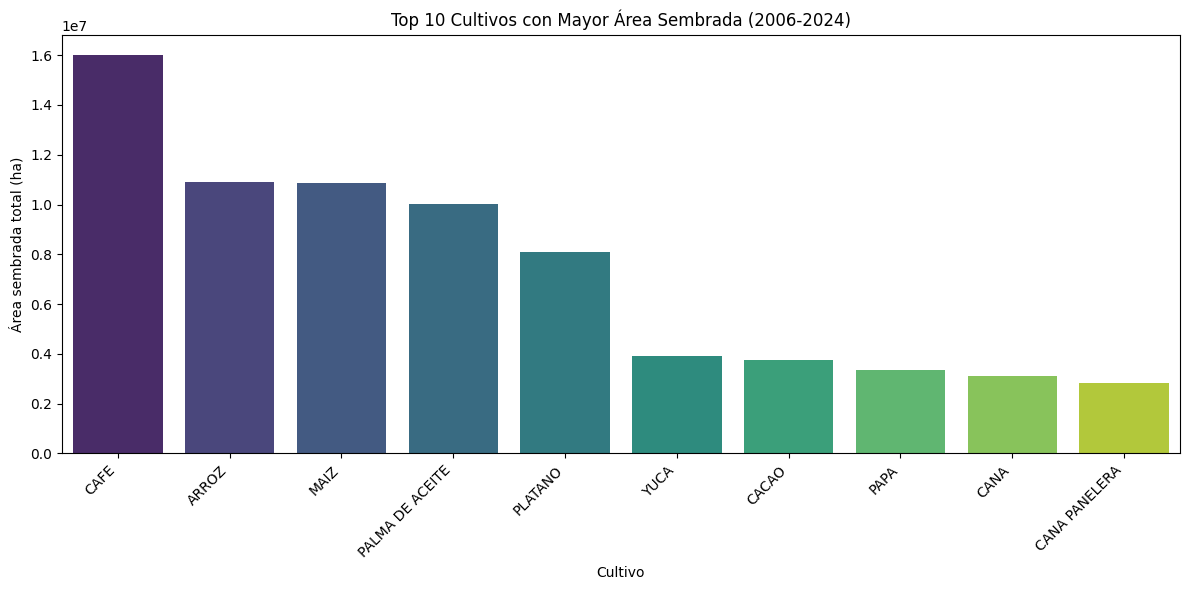

In [12]:
# 4. Gráfico de los 10 cultivos con mayor área sembrada

# Convert 'Área sembrada (ha)' to numeric, coercing errors to NaN
datos3['Área sembrada (ha)'] = pd.to_numeric(datos3['Área sembrada (ha)'], errors='coerce')

# Fill NaN values in 'Área sembrada (ha)' with 0 (assuming missing area means no area sembrada)
datos3['Área sembrada (ha)'] = datos3['Área sembrada (ha)'].fillna(0)

# Group by normalized crop and sum planted area
top_10_crops = datos3.groupby('Cultivo_normalized')['Área sembrada (ha)'].sum()

# Sort in descending order and select the top 10
top_10_crops = top_10_crops.sort_values(ascending=False).head(10)

# Create a bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x=top_10_crops.index, y=top_10_crops.values, palette="viridis")


# Add labels and title
plt.xlabel("Cultivo")
plt.ylabel("Área sembrada total (ha)")
plt.title("Top 10 Cultivos con Mayor Área Sembrada (2006-2024)")
plt.xticks(rotation=45, ha='right')
plt.tight_layout() # Adjust layout to prevent labels overlapping
plt.show()

In [11]:
import plotly.express as px

# Ensure 'Área sembrada (ha)' is numeric and handle missing values
datos3['Área sembrada (ha)'] = pd.to_numeric(datos3['Área sembrada (ha)'], errors='coerce')
datos3['Área sembrada (ha)'] = datos3['Área sembrada (ha)'].fillna(0) # Fill NaN with 0

# Group by normalized crop and sum planted area
top_10_crops = datos3.groupby('Cultivo_normalized')['Área sembrada (ha)'].sum()

# Sort in descending order and select the top 10
top_10_crops = top_10_crops.sort_values(ascending=False).head(10)

# Convert the Series to a DataFrame for Plotly
top_10_crops_df = top_10_crops.reset_index()
top_10_crops_df.columns = ['Cultivo', 'Área Sembrada Total (ha)']

# Create an interactive bar chart using Plotly Express
fig = px.bar(top_10_crops_df,
             x='Cultivo',
             y='Área Sembrada Total (ha)',
             title='Top 10 Cultivos con Mayor Área Sembrada (2006-2024)')

# Show the plot
fig.show()